## Newton's Rings (W5) - Sample Data Analysis

In [57]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Import the data:

In [58]:
Data=pd.read_csv("W5Data.txt")
Data=Data.to_numpy()
Data

array([[ 187.57932],
       [ 290.     ],
       [ 599.     ],
       [ 801.     ],
       [1101.     ],
       [1159.     ],
       [1225.     ],
       [1335.     ],
       [1442.     ],
       [1537.     ],
       [1622.     ]])

In [59]:
a=float(Data[0])
conversionvalue=a

As the measurement's smallest scale is 1 px, thus the uncertainty is:

In [60]:
length_unc=1/(a/2)
length_unc

0.010662156148129763

in meters,

In [61]:
length_unc=length_unc*0.001
length_unc

1.0662156148129763e-05

Convert all pixel lengths to milimeters:

In [62]:
Allpx=Data[1:]
Allpx
Tonum=Allpx/conversionvalue
diameters=np.zeros(len(Tonum))
for i in range(len(Tonum)):
    diameters[i]=Tonum[i]

In [63]:
diameters=diameters*0.001
diameters

array([0.00154601, 0.00319332, 0.00427019, 0.00586952, 0.00617872,
       0.00653057, 0.00711699, 0.00768741, 0.00819387, 0.00864701])

Square the diameters:

In [64]:
diameterssq=diameters**2

Plot the squared diameter as a function of order:

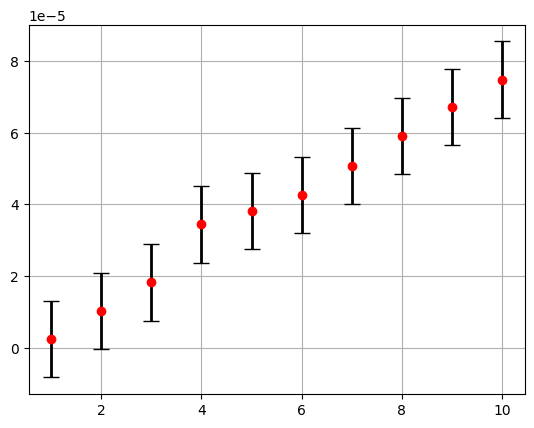

In [70]:
order=np.arange(1,11,1)
fig,ax=plt.subplots()
ax.errorbar(order,diameterssq,length_unc,fmt='ro',linewidth=2, capsize=6,ecolor='black')
ax.grid()
plt.show()

Fit the data using a linear regression:

In [66]:
def DataModel(x,a,b):
    return a*x+b

In [67]:
popt,pcov=curve_fit(DataModel,order,diameterssq)
popt

array([ 7.92365099e-06, -3.80445805e-06])

Graphing the fit:

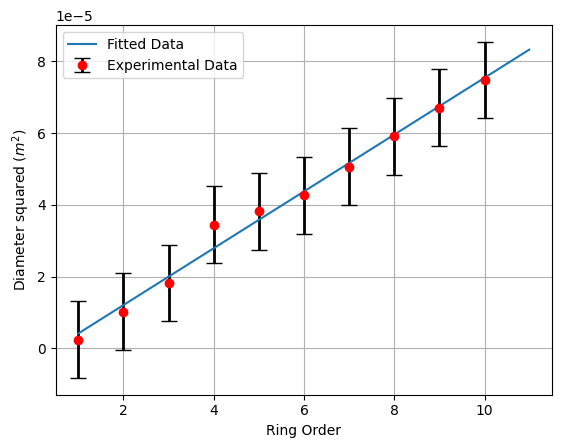

In [71]:
ordergraph=np.arange(1,11,0.01)
fig,ax=plt.subplots()
ax.errorbar(order,diameterssq,length_unc,fmt='ro',linewidth=2, capsize=6,ecolor='black',label="Experimental Data")
ax.plot(ordergraph,DataModel(ordergraph,popt[0],popt[1]),linewidth=1.5,label="Fitted Data")
ax.set_xlabel("Ring Order")
ax.set_ylabel("Diameter squared ($m^2$)")
ax.legend()
ax.grid()
plt.show()

As the equation is
$$D^2=4Rm\lambda$$

Thus, the gradient, is
$$m=4R\lambda$$

The wavelength is
$$\lambda=\frac{m}{4R}$$

In [68]:
L=popt[0]/(4*3400*1e-3)
L

5.826213960259169e-07

With an uncertainty of:

In [72]:
perr = np.sqrt(np.diag(pcov))
perr

array([3.04121195e-07, 1.88702238e-06])

in nanometers,

In [69]:
L*1e9

582.621396025917